## Analysing Air Quality in New York, 2024: PM2.5 & Air Pollution

### Objective
- To demonstrate SQL proficiency by querying relational datasets on air pollution in New York in 2024
- Analyze trends and potential public health risks using Python
- Present key insights via a dashboard in Tableau Public

### Data Sources
- [pm25_ny](https://www.epa.gov/outdoor-air-quality-data/download-daily-data) (daily PM2.5 concentration levels for New York in 2024)
- [daily_aqi](https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI) (daily air quality index values for pollutants across the US in 2024)
- [monitor_conc](https://aqs.epa.gov/aqsweb/airdata/download_files.html#Meta) (annual pollutant concentration summaries with site coordinates in 2024)

### Data Loading
- Packages: pandas, sqlite3
- Objective: load datasets into pandas dataframes before loading into sql tables
- NB: sqlite3 not capable of loading in csv files directly

In [1]:
##import packages
import pandas as pd
import sqlite3

In [16]:
##data loading to dataframes
pm25_ny = pd.read_csv("Desktop/python/PM25/pm25_2024_ny.csv")
daily_aqi = pd.read_csv("Desktop/python/PM25/daily_aqi_2024.zip")
monitor_conc = pd.read_csv("Desktop/python/PM25/annual_conc_by_monitor_2024.zip")

In [44]:
##glimpse column names
pm25_ny.columns = pm25_ny.columns.str.strip()
print(pm25_ny.columns)

daily_aqi.columns = daily_aqi.columns.str.strip()
print(daily_aqi.columns)

monitor_conc.columns = monitor_conc.columns.str.strip()
print(monitor_conc.columns)

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'Method Description', 'CBSA Code', 'CBSA Name',
       'State FIPS Code', 'State', 'County FIPS Code', 'County',
       'Site Latitude', 'Site Longitude'],
      dtype='object')
Index(['CBSA', 'CBSA Code', 'Date', 'AQI', 'Category', 'Defining Parameter',
       'Defining Site', 'Number of Sites Reporting'],
      dtype='object')
Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Metric Used', 'Method Name', 'Year',
       'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Completeness Indicator', 'Valid Day Count',
       'Required Day Count', 'Exceptional Data Count', 'Null Dat

In [45]:
##create database via sqlite3 
connection = sqlite3.connect('Desktop/python/PM25/pollution.db')

#load dataframe to sql table
pm25_ny.to_sql('pm25_ny', connection, if_exists='replace')
daily_aqi.to_sql('daily_aqi', connection, if_exists='replace')
monitor_conc.to_sql('monitor_onc', connection, if_exists='replace')

#close connection
connection.close()

I can check that the database was created and the data was uploaded with [SQLite Viewer](https://inloop.github.io/sqlite-viewer/).

### Data Querying
- For each question, manipulate data tables for results (join, filter, order)
- Filter PM2.5 for levels that exceeed WHO threshold
- Filter days with worst air quality index
- Order geographic hotspots based on pollutant concentrations

##### 1) How many days in 2024 exceed healthy PM2.5 limits in NY?
- The [EPA](https://www.epa.gov/pm-pollution/national-ambient-air-quality-standards-naaqs-pm#:~:text=%E2%80%8B%20EPA%20is%20setting%20the,with%20the%20available%20health%20science.) defines the annual PM2.5 threshold as ≤9 µg/m³
- The [WHO](https://iris.who.int/bitstream/handle/10665/345334/9789240034433-eng.pdf) defines the annual PM2.5 thresshold as ≤5 µg/m³

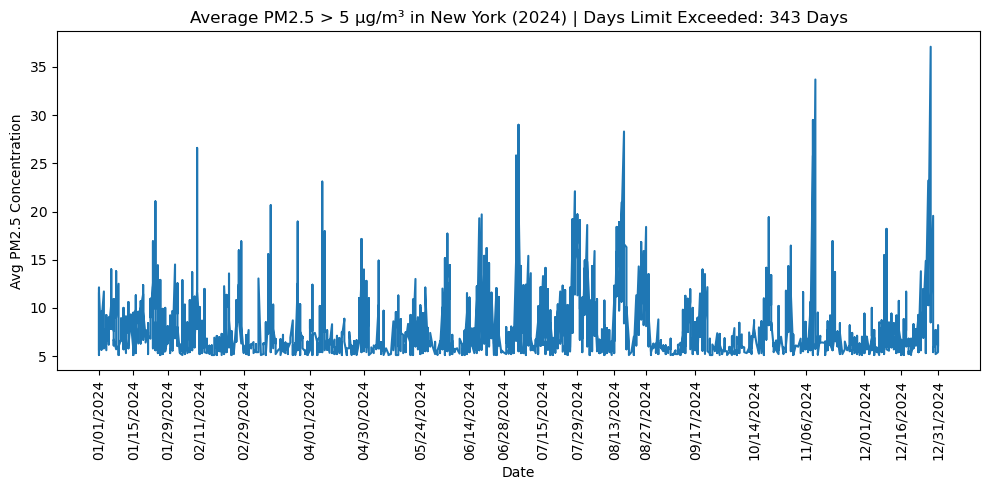

<function Connection.close()>

In [71]:
##total number of days (unfiltered)
total_days = pm25_ny['Date'].nunique()

##open database connection
connection = sqlite3.connect('Desktop/python/PM25/pollution.db')

##filter rows where PM2.5 concentration > 5, groupby date
query = """
SELECT Date, County, AVG([Daily Mean PM2.5 Concentration]) AS avg_pm25
FROM pm25_ny
WHERE [Daily Mean PM2.5 Concentration] > 5
GROUP BY Date, County
"""

exceeds = pd.read_sql_query(query, connection)

##total number of days (filtered)
total_days_exceeds = exceeds['Date'].nunique()

##visualistion for Jupyter Notebook
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(exceeds['Date'], exceeds['avg_pm25'])
plt.title(f"Average PM2.5 > 5 µg/m³ in New York (2024) | Days Limit Exceeded: {total_days_exceeds} Days")
plt.xticks(exceeds['Date'][::180], rotation=90)
plt.xlabel("Date")
plt.ylabel("Avg PM2.5 Concentration")
plt.tight_layout()
plt.show()

##close connection
connection.close

In [70]:
##visualisation for Tableau (dashboard of PM2.5 with filters for concentration, date)
exceeds.to_csv('Desktop/python/PM25/pm25_filtered.csv', index=False)

#### Tableau Insights
With the csv uploaded to Tableau I can turn these insights into an interactive dashboard.

[Pollution Dashboard](https://public.tableau.com/app/profile/anna.moskow/viz/PollutionAnalysis_17448368651460/Dashboard1?publish=yes)
- In New York, 319/366 days (87%) were above WHO PM2.5 thresholds in 2024
- There is a consistent trend of PM2.5 peaking in the summer months (June, July, August)
- The interactive dashboard allows you to see PM2.5 concentration levels for each county individually